In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

PERFORM DATA CLEANING AND EXPLORATORY DATA ANALYSIS (EDA) ON TITANIC DATA SET .EXPLORE RELATIONSHIPS BETWEEN VARIABLES,IDENTIFY PATTERNS AND TRENDS IN DATA 

In [2]:
df=pd.read_csv("train ship.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
for i in df:
    print(i,":",df[i].unique())
    print("*******************")

PassengerId : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 

In [7]:
#data cleaning
#1) age normally to replace missing values we can replace using mean but if age is crucial for analysis 
#The median is often chosen for imputing missing values, 
#especially for numerical data like Age, because it's less affected by outliers compared to the mean. 
#For instance, if there were extremely high or low ages in the dataset (e.g., infants or very old passengers), 
#the mean might get skewed, leading to inaccurate imputation

In [9]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [12]:
df["Age"].isnull().sum()

0

In [13]:
#enbarked being categorial data mode will be better option to replace missing values ,
#missing values with the mode helps preserve the overall distribution of the data.
#the mode is the most common value.If the majority of passengers boarded at a specific port 
#(example  like s ), it's reasonable to assume missing values are also from this port.

In [14]:
print(df["Embarked"].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [16]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)#When you use df['Embarked'].mode(), the mode() function returns a Series of modes (most frequent values). If there’s more than one mode (i.e., a tie), your code might not work as expected. 
#To ensure you're using a single value, use [0] to pick the first mode explicitly:

In [17]:
df["Embarked"].isnull().sum()

0

In [18]:
df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [19]:
df["Cabin"].value_counts().sum()

204

In [20]:
total_rows = len(df)

In [21]:
total_rows

891

In [22]:
df['Cabin'].isnull().sum()

687

In [23]:
#so based on 891 rows in cabin i have 204 non missing values, and 687 missing values ,so it doesnt provide me major reason for analysis as major data is missing 
#and seems irrelevant for further analysis

In [24]:
df.drop("Cabin",axis=1,inplace=True)

In [25]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [61]:
#EDA
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,445.000000,0.647587,338.528620,1.536476
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,257.353842,0.477990,200.850657,0.791503
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,222.500000,0.000000,158.500000,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,445.000000,1.000000,337.000000,2.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,667.500000,1.000000,519.500000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,890.000000,1.000000,680.000000,2.000000


In [26]:
#now my data is cleaned removed missing values and now we can carry out our next process

In [27]:
#now we can split data based on category of data types

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [29]:
#SEPARATING DATA INTO TWO VARIABLES
#IN df_NUM STORING DATA WHO HAS INT AND FLOAT AS A DATA TYPE
#IN df_CAT STORING DATA WHO HAS OBJECT AS A DATA TYPE

df_num=df.select_dtypes(["int64","float64"])
df_cat=df.select_dtypes("object")

In [30]:
df_num

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,28.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [31]:
df_cat

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [62]:
from sklearn.preprocessing import LabelEncoder # did label encoding on categorial data as sex column may be useful for gaining insights 

In [33]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [34]:
df_cat

,Name,Sex,Ticket,Embarked
0,108,1,523,2
1,190,0,596,0
2,353,0,669,2
3,272,0,49,2
4,15,1,472,2
...,...,...,...,...
886,548,1,101,2
887,303,0,14,2
888,413,0,675,2
889,81,1,8,0


In [35]:
df=pd.concat([df_num,df_cat],axis=1)

In [36]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name,Sex,Ticket,Embarked
0,1,0,3,22.0,1,0,7.2500,108,1,523,2
1,2,1,1,38.0,1,0,71.2833,190,0,596,0
2,3,1,3,26.0,0,0,7.9250,353,0,669,2
3,4,1,1,35.0,1,0,53.1000,272,0,49,2
4,5,0,3,35.0,0,0,8.0500,15,1,472,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,548,1,101,2
887,888,1,1,19.0,0,0,30.0000,303,0,14,2
888,889,0,3,28.0,1,2,23.4500,413,0,675,2
889,890,1,1,26.0,0,0,30.0000,81,1,8,0


In [39]:
#let see age count /age of person more  who were in ship according to data 

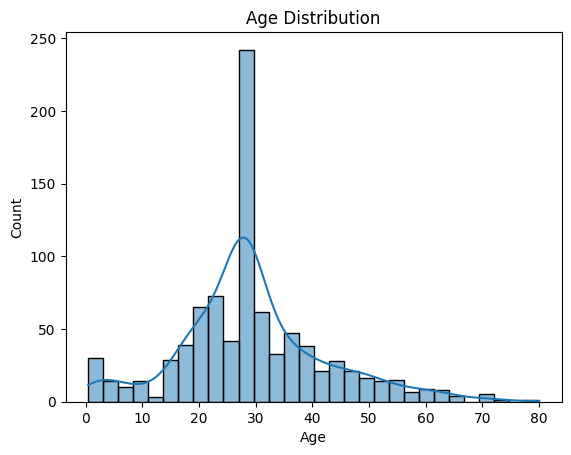


Age Distribution:


In [38]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()
print("\nAge Distribution:")

In [41]:
#survival rate vs age 

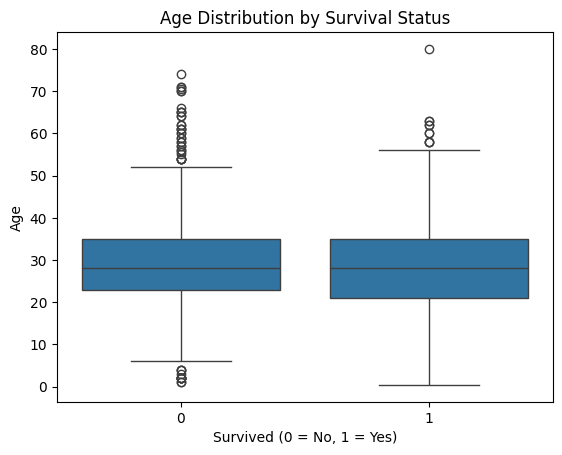

In [45]:
sns.boxplot(data=df, x="Survived", y="Age")
plt.title("Age Distribution by Survival Status")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()


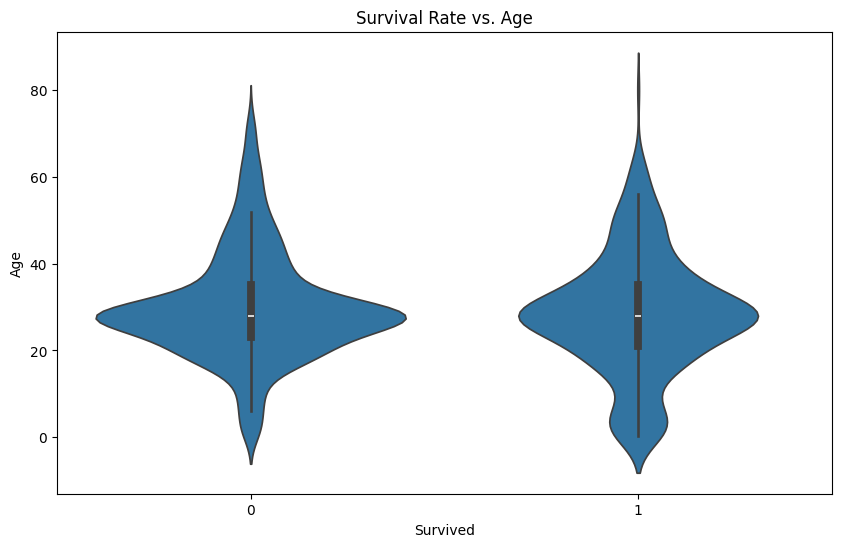

In [50]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Survival Rate vs. Age')
plt.show()

In [51]:
#1 represents the group of individuals who survived.
#0 represents the group of individuals who did not survive
#it is providing insights of how age is distributed in each group
#group people who are younger in age have a better chance of survival

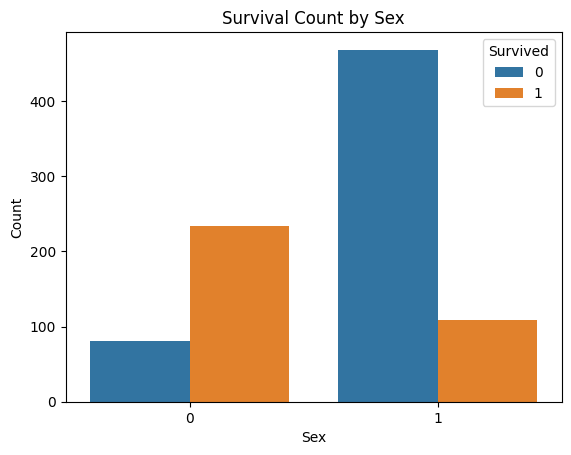

In [53]:
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


In [54]:
#1 INDICATES MALE COUNTS  WHO WERE SURVIVED OR NOT
#0 INDICATES FEMALE COUNTS WHO WERE SURVIVED OR NOT
#BLUE INDIACTES WHO DIDNT SURVIVED
#ORANGE INDICATES WHO SURVIVED

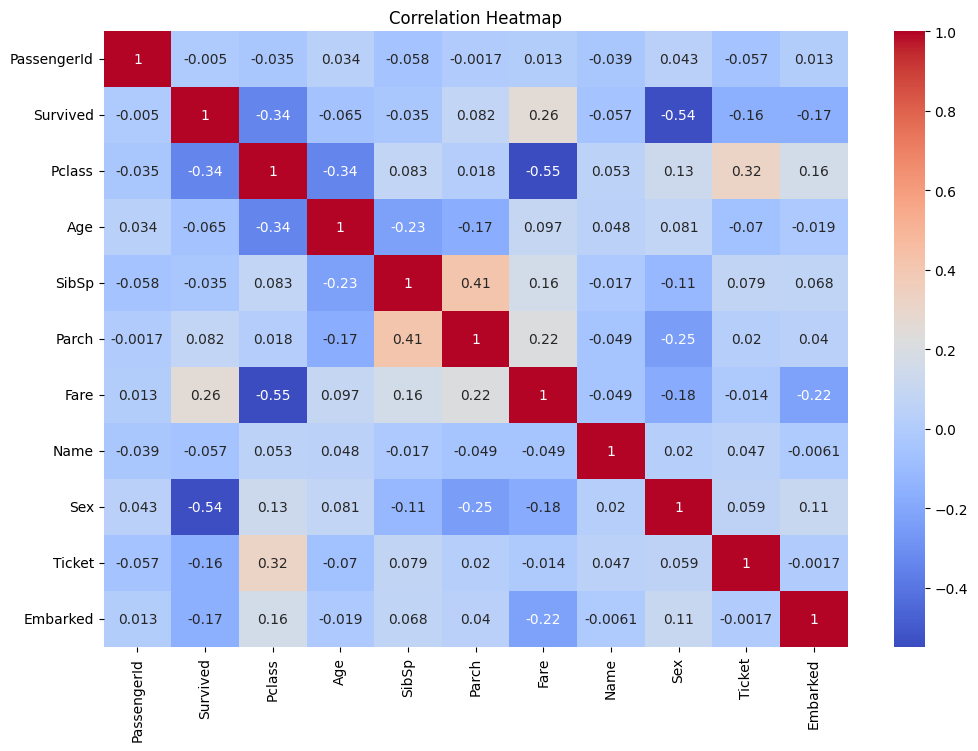

In [58]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [59]:
#A POSITIVE CORRELATION BETWEEN SURVIVED AND FARE AS FARE INCREASES POSSIBILITY OF SURVIVAL ALSO INCREASES THE PASSENGER WHO HAD PAID 
#MORE IN Titanic ship had better safety measures ,equipments inorder to survive

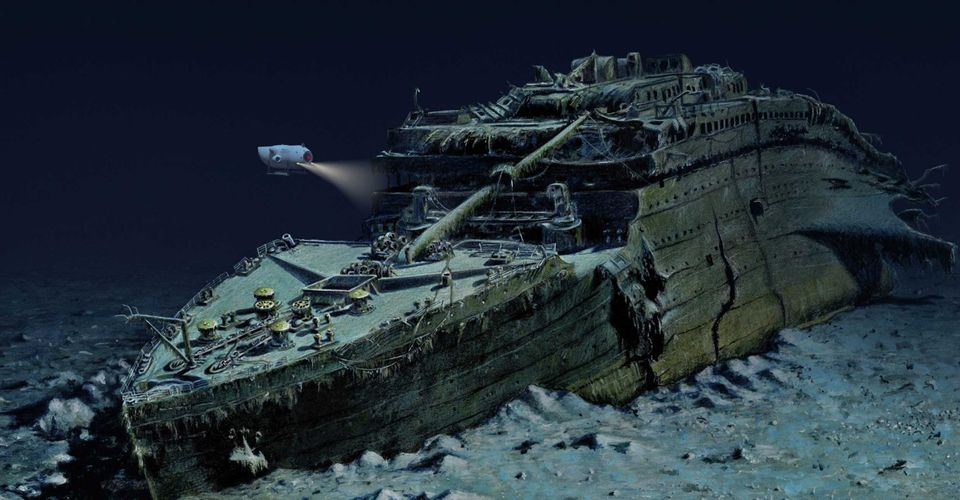

                                                      THANK YOU